In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import statistics
import matplotlib.pyplot as plt

In [212]:
Cab_Data = pd.read_csv("Cab_Data.csv")
City = pd.read_csv("City.csv")
Customer_ID = pd.read_csv("Customer_ID.csv")
Transaction_ID = pd.read_csv("Transaction_ID.csv")

# Data Cleaning for Cab Data

In [213]:
Cab_Data.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

<AxesSubplot:xlabel='Price Charged'>

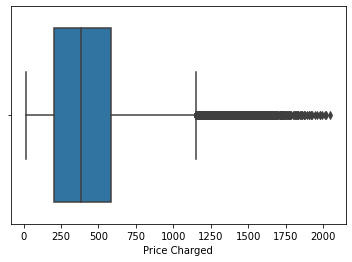

In [120]:
sns.boxplot(x = Cab_Data['Price Charged'])

In [214]:
z_scores = np.abs(scipy.stats.zscore(Cab_Data.select_dtypes(include = 'number')))
outliers = z_scores[z_scores > 3 ]
print(outliers.notnull().sum())

Transaction ID       0
Date of Travel       0
KM Travelled         0
Price Charged     3195
Cost of Trip         0
dtype: int64


In [215]:
ind = outliers['Price Charged'].loc[outliers['Price Charged']>3].index

In [216]:
Out = Cab_Data.loc[ind]

In [217]:
Removed_Transaction_ID = Out['Transaction ID']

In [218]:
statistics.mean(Cab_Data['Price Charged']-Cab_Data['Cost of Trip'])

137.2531984345784

The average profit is very high in out liers so it is better to remove all the records.

In [219]:
statistics.mean(Cab_Data['Price Charged'].loc[ind]-Cab_Data['Cost of Trip'].loc[ind])

832.0077110485133

In [220]:
Cab_Data.drop(ind, axis=0, inplace = True)

In [221]:
Cab_Data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


<AxesSubplot:xlabel='Price Charged'>

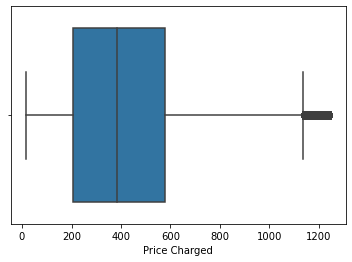

In [129]:
sns.boxplot(x = Cab_Data['Price Charged'])

# Data Cleaning for Customer ID

In [222]:
Customer_ID.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [223]:
Customer_ID['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<AxesSubplot:xlabel='Income (USD/Month)'>

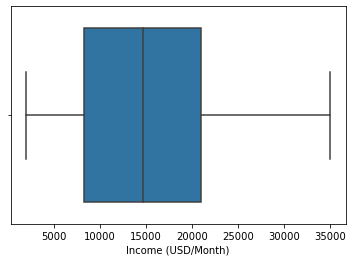

In [135]:
sns.boxplot(x = Customer_ID['Income (USD/Month)'])

<AxesSubplot:xlabel='Age'>

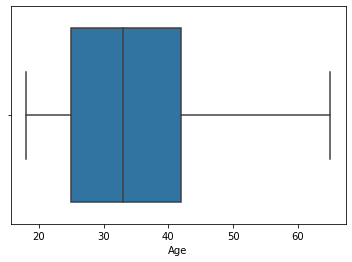

In [136]:
sns.boxplot(x = Customer_ID['Age'])

# Data Cleaning for Transaction ID

In [224]:
Transaction_ID

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [225]:
TR_OU_IN = Transaction_ID[Transaction_ID["Transaction ID"].isin(list(Removed_Transaction_ID))].index

In [226]:
Transaction_ID.drop(TR_OU_IN, axis=0, inplace=True)

In [227]:
Transaction_ID

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [228]:
Transaction_ID.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

# Creating Master Dataset.

In [229]:
Master_Data = Cab_Data.join(Transaction_ID.set_index('Transaction ID'), on='Transaction ID')

In [230]:
Master_Data = Master_Data.join(Customer_ID.set_index('Customer ID'), on = 'Customer ID')

In [231]:
Master_Data[Master_Data['Customer ID'] == 29290].count()

Transaction ID        3
Date of Travel        3
Company               3
City                  3
KM Travelled          3
Price Charged         3
Cost of Trip          3
Customer ID           3
Payment_Mode          3
Gender                3
Age                   3
Income (USD/Month)    3
dtype: int64

In [232]:
Master_Data.groupby(['City']).count()

,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
City,,,,,,,,,,,
ATLANTA GA,7552,7552,7552,7552,7552,7552,7552,7552,7552,7552,7552
AUSTIN TX,4891,4891,4891,4891,4891,4891,4891,4891,4891,4891,4891
BOSTON MA,29692,29692,29692,29692,29692,29692,29692,29692,29692,29692,29692
CHICAGO IL,56624,56624,56624,56624,56624,56624,56624,56624,56624,56624,56624
DALLAS TX,6974,6974,6974,6974,6974,6974,6974,6974,6974,6974,6974
DENVER CO,3823,3823,3823,3823,3823,3823,3823,3823,3823,3823,3823
LOS ANGELES CA,48007,48007,48007,48007,48007,48007,48007,48007,48007,48007,48007
MIAMI FL,6443,6443,6443,6443,6443,6443,6443,6443,6443,6443,6443
NASHVILLE TN,3009,3009,3009,3009,3009,3009,3009,3009,3009,3009,3009


AttributeError: module 'matplotlib.pyplot' has no attribute 'Legend'

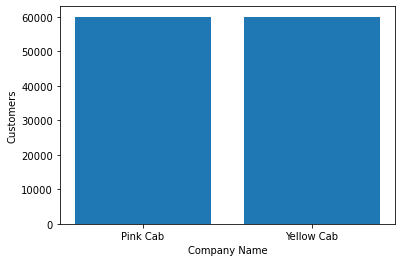

In [202]:
plt.bar(Master_Data['Company'], Master_Data['Customer ID'])
plt.xlabel("Company Name")
plt.ylabel("Customers")
plt.Legend()

In [234]:
Master_Data.to_csv(r'C:\Users\Vivek\OneDrive\Desktop\Data Glacier\Master.csv')

In [233]:
Master_Data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423


Hypothesis:
1) Which Cab company have higher number of customers? \
2) Which City have the highest and lowest customers with respect to each company? \
3) Which Cab company have highest profit?\
4) Which company customers are prefering with age group of 40-60?\
5) Average Customer monthly income of both the cab companies?

All the below graphics are visualized in Tableau.

<img src='HYP1.png'>

<img src='HYP2.png'>

New York has the highest number of customers and Pittsburgh has lowest number of customers for yellow cabs.\
Compared to all cities Pink cabs have higher customers in Los Angeles and lowest in Pittsburgh.

<img src='HYP3.png'>

<img src='HYP4.png'>

<img src='HYP5.png'>